In [6]:
##Checking the versions of libraries
#pythin version
import sys
print('python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
#Matplotlib
import matplotlib
print('Matplotlib: {}'.format(matplotlib.__version__))
#Sklearn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
#Pandas
import pandas
print('pandas: {}'.format(pandas.__version__))



python: 3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)]
scipy: 1.10.1
Matplotlib: 3.7.1
sklearn: 1.3.0
pandas: 2.0.1


In [10]:
#Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
data = pandas.DataFrame(data=iris.data, columns=names[:-1])  # Exclude the 'class' column
data['class'] = iris.target 

In [15]:
print(data.shape)


(150, 5)


In [16]:
print(data.head(30))

    sepal length  sepal width  petal length  petal width  class
0            5.1          3.5           1.4          0.2      0
1            4.9          3.0           1.4          0.2      0
2            4.7          3.2           1.3          0.2      0
3            4.6          3.1           1.5          0.2      0
4            5.0          3.6           1.4          0.2      0
5            5.4          3.9           1.7          0.4      0
6            4.6          3.4           1.4          0.3      0
7            5.0          3.4           1.5          0.2      0
8            4.4          2.9           1.4          0.2      0
9            4.9          3.1           1.5          0.1      0
10           5.4          3.7           1.5          0.2      0
11           4.8          3.4           1.6          0.2      0
12           4.8          3.0           1.4          0.1      0
13           4.3          3.0           1.1          0.1      0
14           5.8          4.0           

In [17]:
print(data.describe())

       sepal length  sepal width  petal length  petal width       class
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


In [19]:
print(data.groupby ('class').size())

class
0    50
1    50
2    50
dtype: int64


NameError: name 'plot' is not defined

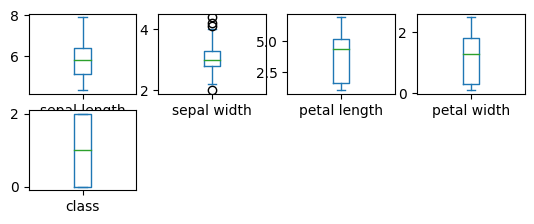

In [25]:
#Univariate plot
data.plot(kind ='box', subplots = True, layout=(4,4), sharex = False, sharey = False)
plot.show()

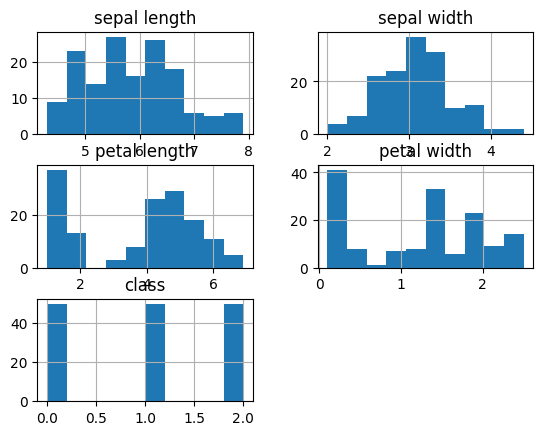

In [26]:
#Histogram
data.hist()
plt.show()

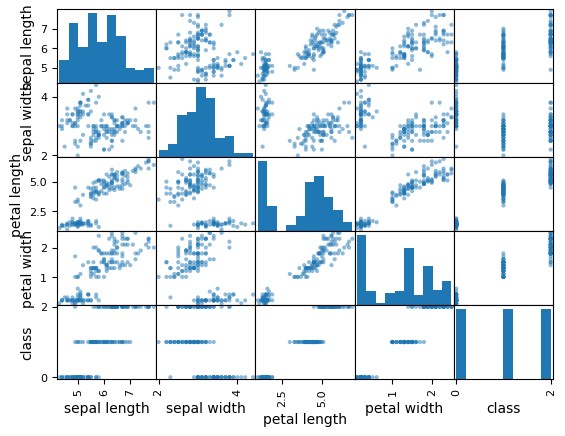

In [27]:
#Multivariate

scatter_matrix(data)
plt.show()

In [29]:
#ValidAtion data set
# splitting data into 80 and 20
array = data.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 6
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y, test_size = validation_size, random_state = seed)


In [30]:
seed = 6
scoring = 'accuracy'

In [39]:
#spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
#Evaluate each model in turn

results = []
names=[]
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = None)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

LR: 0.950000 (0.076376)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.055902)
CART: 0.958333 (0.041667)
NB: 0.966667 (0.055277)
SVM: 0.950000 (0.076376)
